# Importing Necessary Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

<br><br>
# Importing and Cleaning the dataset

In [3]:
df = pd.read_csv('./datasets/nearest-earth-objects(1910-2024).csv')
df.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

<br>

## 1. Exploring the dataset:

In [3]:
df.shape

(338199, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
df.describe()

neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.352878       51060.662908   4.153535e+07  
std                  0.701869       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  
50%                  0.163697       47560.465474   4.332674e+07  
75%                  0.422708       66673.820614   5.933961e+07  
max                 83.953727      291781.106613   7.479865e+07

<br>

## 2. Checking class distribution:

In [6]:
df['is_hazardous'].value_counts()

False    295037
True      43162
Name: is_hazardous, dtype: int64

<br>

## 3. Checking for missing values

### a) Finding percentage of missing data

In [4]:
missing_values = pd.isna(df).sum()
missing_values

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [5]:
number_of_missing_values = missing_values.sum()
percent_of_missing_data = (number_of_missing_values/len(df))*100
print(f"Percentage of missing data = {percent_of_missing_data}%")

Percentage of missing data = 0.0248374477748308%


<br><br>
### b) Handling missing values by filling them with mean of their respective columns

In [6]:
df['absolute_magnitude'].fillna(value=df['absolute_magnitude'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(value=df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(value=df['estimated_diameter_max'].mean(), inplace=True)

In [7]:
missing_values = pd.isna(df).sum()
missing_values

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

<br><br>
## 4. Checking for duplicates

In [10]:
df.duplicated().sum()

0

#### i.e no duplicates

<br><br>
# Exploratory Data Analysis

In [11]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

<br>

## Plot 1: Count of Hazardous vs Non-Hazardous NEOs

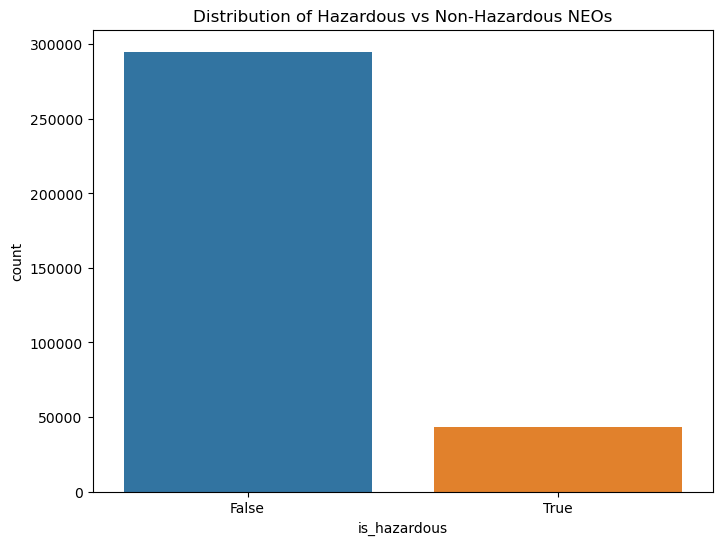

False    295037
True      43162
Name: is_hazardous, dtype: int64


In [66]:
plt.figure(figsize=(8,6))
sns.countplot(df, x='is_hazardous')   
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

print(df['is_hazardous'].value_counts())

<h5> <i>The "is_hazardous" target column is imbalanced, with far fewer hazardous objects compared to non-hazardous ones. We will be handling this class imbalance in our data preprocessing.</i> </h5>

<br>

## Plot 2: Distribution of Absolute Magnitude

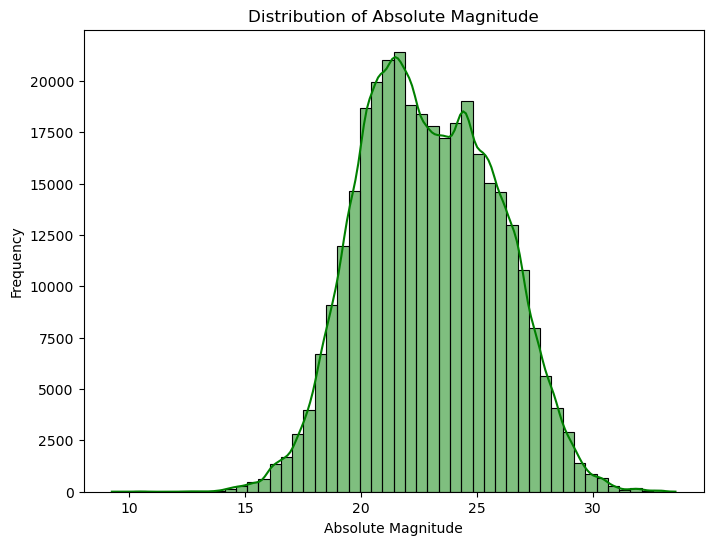

count    338199.000000
mean         22.932525
std           2.911096
min           9.250000
25%          20.740000
50%          22.800000
75%          25.100000
max          33.580000
Name: absolute_magnitude, dtype: float64


In [23]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='absolute_magnitude', bins=50, color='green', kde=True)  # histplot for continuous columns
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

print(df['absolute_magnitude'].describe())

<br>

## Plot 3: Distribution of Minimum Estimated Diameter

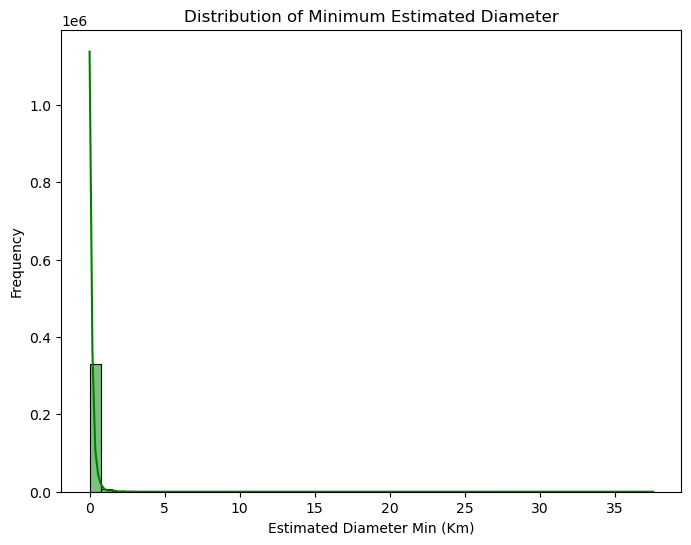

count    338199.000000
mean          0.157812
std           0.313872
min           0.000511
25%           0.025384
50%           0.073207
75%           0.189041
max          37.545248
Name: estimated_diameter_min, dtype: float64


In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='estimated_diameter_min', bins=50, color='green', kde=True)
plt.title('Distribution of Minimum Estimated Diameter')
plt.xlabel('Estimated Diameter Min (Km)')
plt.ylabel('Frequency')
plt.show()

print(df['estimated_diameter_min'].describe())

<br>

## Plot 4: Distribution of Maximum Estimated Diameter

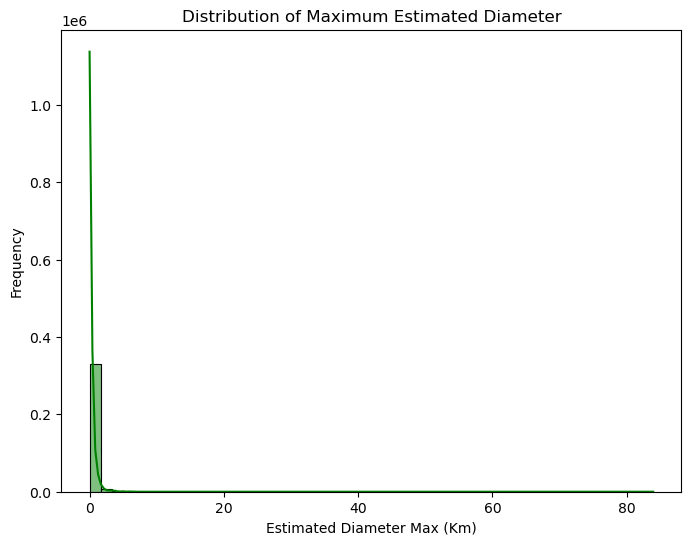

count    338199.000000
mean          0.352878
std           0.701839
min           0.001143
25%           0.056760
50%           0.163697
75%           0.422708
max          83.953727
Name: estimated_diameter_max, dtype: float64


In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='estimated_diameter_max', bins=50, color='green', kde=True)
plt.title('Distribution of Maximum Estimated Diameter')
plt.xlabel('Estimated Diameter Max (Km)')
plt.ylabel('Frequency')
plt.show()

print(df['estimated_diameter_max'].describe())

<br>

## Plot 5: Distribution of Relative Velocity

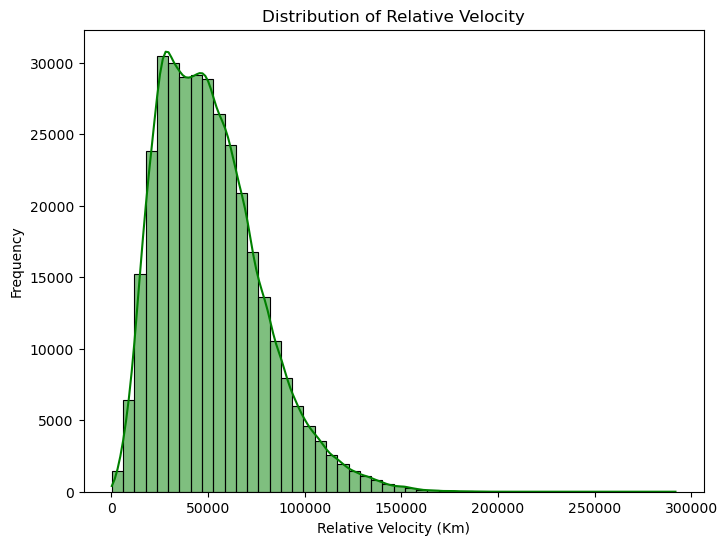

count    338199.000000
mean      51060.662908
std       26399.238435
min         203.346433
25%       30712.031471
50%       47560.465474
75%       66673.820614
max      291781.106613
Name: relative_velocity, dtype: float64


In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='relative_velocity', bins=50, color='green', kde=True)
plt.title('Distribution of Relative Velocity')
plt.xlabel('Relative Velocity (Km)')
plt.ylabel('Frequency')
plt.show()

print(df['relative_velocity'].describe())

<br>

## Plot 6: Boxplot of Relative Velocity

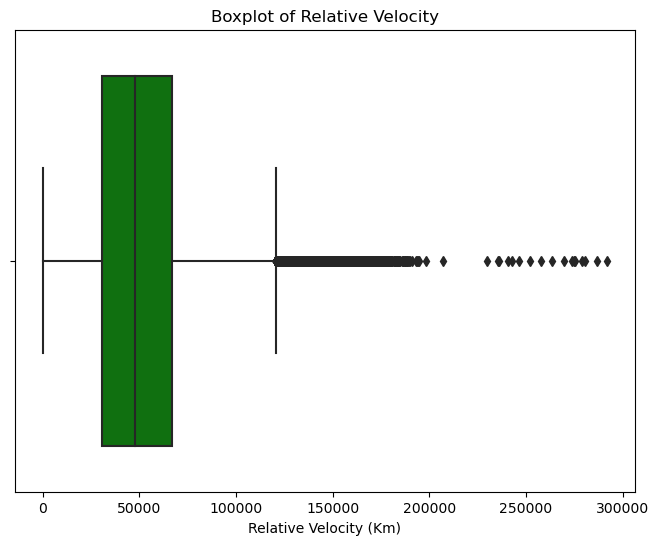

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(df, x='relative_velocity', color='green')
plt.title('Boxplot of Relative Velocity')
plt.xlabel('Relative Velocity (Km)')
plt.show()

<br>

## Plot 7: Distribution of Miss Distance

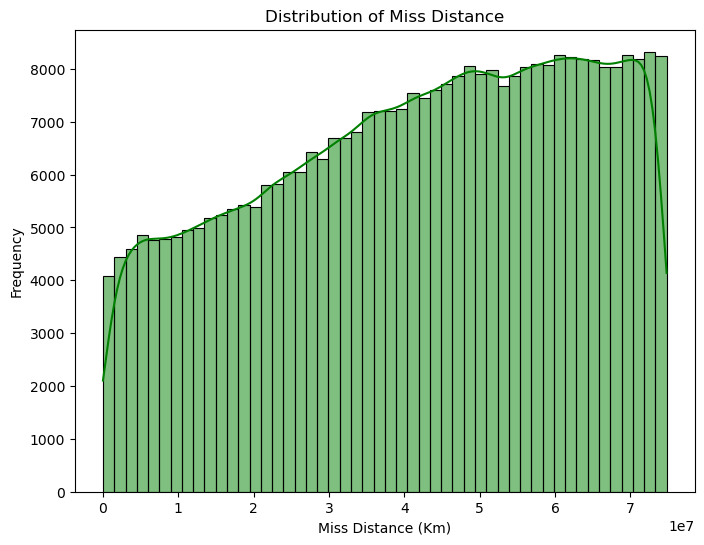

count    3.381990e+05
mean     4.153535e+07
std      2.077399e+07
min      6.745533e+03
25%      2.494540e+07
50%      4.332674e+07
75%      5.933961e+07
max      7.479865e+07
Name: miss_distance, dtype: float64


In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='miss_distance', bins=50, color='green', kde=True)
plt.title('Distribution of Miss Distance')
plt.xlabel('Miss Distance (Km)')
plt.ylabel('Frequency')
plt.show()

print(df['miss_distance'].describe())

<br>

## Plot 8: Count of NEOs by Orbiting Body

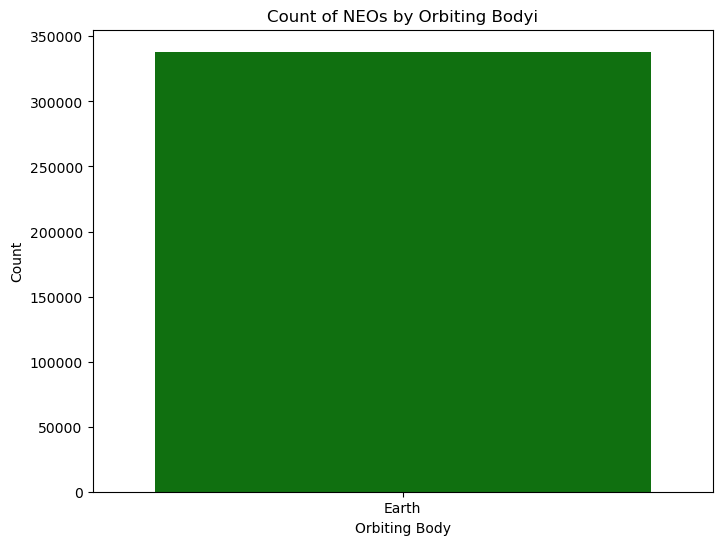

Earth    338199
Name: orbiting_body, dtype: int64


In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df, x='orbiting_body', color='green')
plt.title('Count of NEOs by Orbiting Bodyi')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.show()

print(df['orbiting_body'].value_counts())

<h5><i>since orbiting_body has only one value so it does not provide us with any additional information(just like neo_id and name columns) and we can ignore it during the training and testing phase.</i></h5>

<br>

## Plot 9: Relative Velocity by Hazardous Status

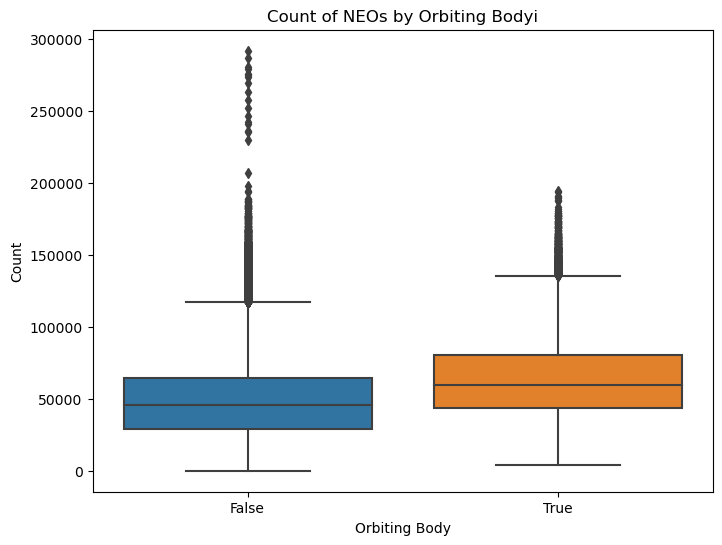

Mean relative velocity when NEO is non-hazardous: 49172.265509755394
Mean relative velocity when NEO is hazardous: 63968.94109365234


In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(df, x='is_hazardous', y='relative_velocity')
plt.title('Count of NEOs by Orbiting Bodyi')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.show()

print(f"Mean relative velocity when NEO is non-hazardous: {df[df['is_hazardous'] == False]['relative_velocity'].mean()}")
print(f"Mean relative velocity when NEO is hazardous: {df[df['is_hazardous'] == True]['relative_velocity'].mean()}")

<br>

## Plot 10: Absolute Magnitude vs Estimated Diameter

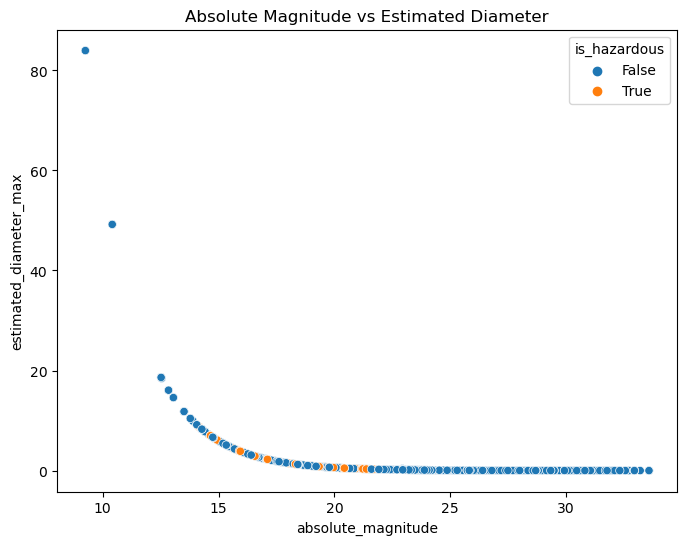

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='absolute_magnitude', y='estimated_diameter_max', hue='is_hazardous')
plt.title('Absolute Magnitude vs Estimated Diameter')
plt.show()

<br>

## Plot 11: Pairplot of Numerical Features

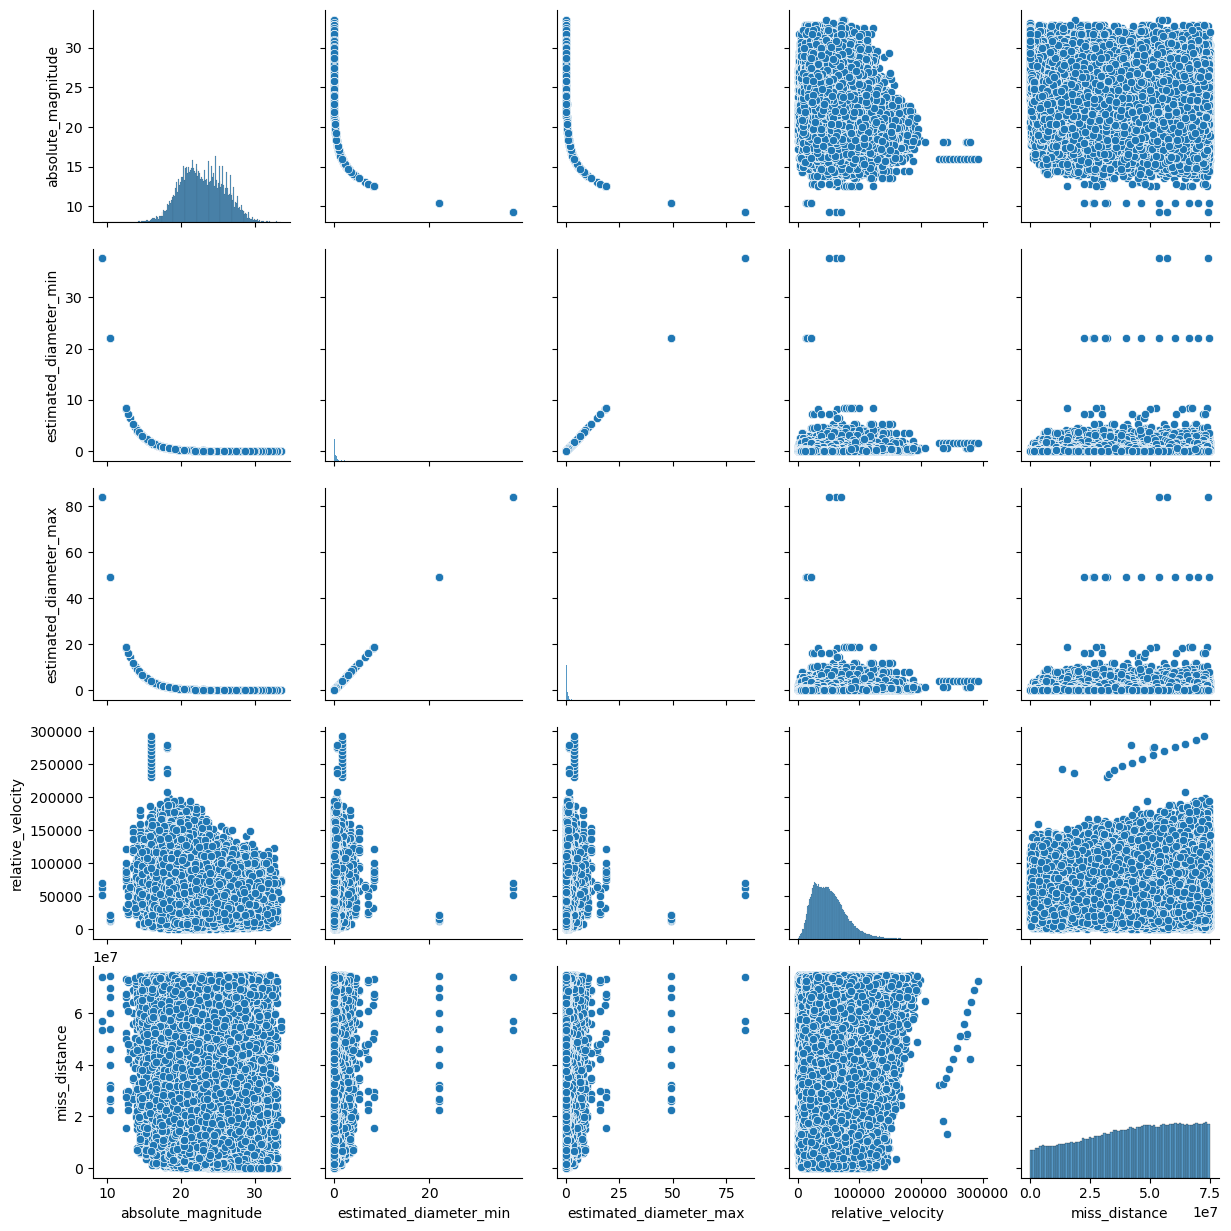

In [55]:
sns.pairplot(df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance']])
plt.show()

<br>

## Plot 12:

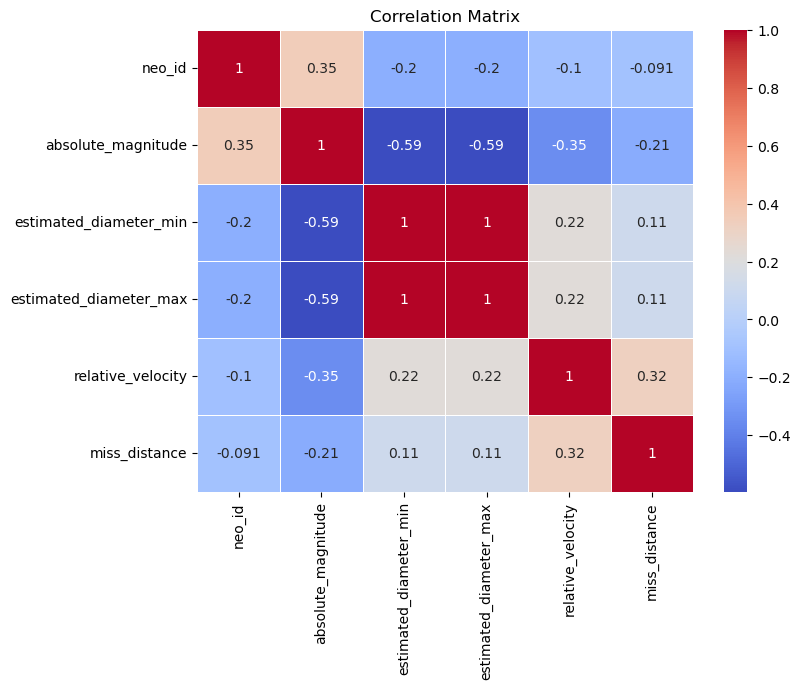

In [58]:
# Selecting onlt continuous/numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Correlation matix
corr_matrix = numeric_data.corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<br>

## Plot 13: Top 10 Closest NEOs to earth

In [12]:
import plotly.express as px

In [13]:
top_10_closest = df.nsmallest(10, 'miss_distance')

fig = px.bar(top_10_closest, 
              x='miss_distance', 
              y='name', 
              title='Top 10 Closest NEOs to Earth', 
              text_auto=True,
              labels={'miss_distance': 'Miss Distance (km)', 'name': 'NEO Name'},
              color_discrete_sequence=['#1DB954'],
              width=1000, 
              height=800  )

fig.show()

<br><br>
# Data Preprocessing

In [10]:
print(f"Dataset: \n")
df.head()

Dataset: 



neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

<br>

## 1. Encoding Categorical Columns

In [11]:
categorical_features = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['name', 'orbiting_body', 'is_hazardous']
Numerical Features: ['neo_id', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']


In [12]:
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df.head()

neo_id   name  absolute_magnitude  estimated_diameter_min  \
0  2162117  30603               19.14                0.394962   
1  2349507  31395               18.50                0.530341   
2  2455415  32118               21.45                0.136319   
3  3132126    736               20.63                0.198863   
4  3557844   4880               22.70                0.076658   

   estimated_diameter_max  orbiting_body  relative_velocity  miss_distance  \
0                0.883161              0       71745.401048   5.814362e+07   
1                1.185878              0      109949.757148   5.580105e+07   
2                0.304818              0       24865.506798   6.720689e+07   
3                0.444672              0       78890.076805   3.039644e+07   
4                0.171412              0       56036.519484   6.311863e+07   

   is_hazardous  
0             0  
1             1  
2             0  
3             0  
4             0

<br>

## 2. Feature selection

In [14]:
corr_matrix = df.corr()
print(corr_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187021
estimated_diameter_min    0.164840
estimated_diameter_max    0.164840
name                      0.120058
miss_distance            -0.006540
neo_id                   -0.156748
absolute_magnitude       -0.343994
orbiting_body                  NaN
Name: is_hazardous, dtype: float64


<h5><i> Since name, neo_id, and orbiting_body don't have a significant impact on the target i.e they are not relevant for predicting the target, so we will drop them. </i></h5>

In [15]:
df.drop(columns=['neo_id', 'name', 'orbiting_body'], inplace=True)

In [16]:
df.head()

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0               19.14                0.394962                0.883161   
1               18.50                0.530341                1.185878   
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   

   relative_velocity  miss_distance  is_hazardous  
0       71745.401048   5.814362e+07             0  
1      109949.757148   5.580105e+07             1  
2       24865.506798   6.720689e+07             0  
3       78890.076805   3.039644e+07             0  
4       56036.519484   6.311863e+07             0

<br>

## 3. Handling Class Imbalance using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X = df.drop(['is_hazardous'], axis=1)
y = df['is_hazardous']

In [19]:
df['is_hazardous'].value_counts()

0    295037
1     43162
Name: is_hazardous, dtype: int64

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
len(X_resampled)

590074

<h5><i> Increase in the number of rows(oversampling) is the same as the difference b/w the number of rows of the classes </h5></i>

In [27]:
len(X_resampled) - len(X)

251875

In [28]:
df[df['is_hazardous'] == 0].shape[0] - df[df['is_hazardous'] == 1].shape[0]

251875

<br>

## 4. Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

<br>

## 5. Standardizing the numerical data/features

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<br><br>

# Model evaluation and Testing

<br>

## 1. Logistic Regression

### a) Training

In [93]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

<br>

### b) Testing

In [95]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [96]:
print("Logistic Regression Report:")
print(classification_report(y_test, lr_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79     88580
           1       0.76      0.90      0.83     88443

    accuracy                           0.81    177023
   macro avg       0.82      0.81      0.81    177023
weighted avg       0.82      0.81      0.81    177023


Confusion Matrix:
[[63376 25204]
 [ 8497 79946]]


In [98]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy = {lr_accuracy}')

Logistic Regression Accuracy = 0.8096236082316987


<br><br>

## 2. Random Forest

### a) Training

In [100]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<br>

### b) Testing

In [101]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [102]:
print("Logistic Regression Report:")
print(classification_report(y_test, rf_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     88580
           1       0.95      0.95      0.95     88443

    accuracy                           0.95    177023
   macro avg       0.95      0.95      0.95    177023
weighted avg       0.95      0.95      0.95    177023


Confusion Matrix:
[[84398  4182]
 [ 4744 83699]]


In [103]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forrest Accuracy = {rf_accuracy}')

Random Forrest Accuracy = 0.949577173587613


<br><br>

## Plotting ROC curve for Random Forest

In [104]:
y_pred_prob = rf_model.predict_proba(X_test)
y_pred_prob

array([[0.01, 0.99],
       [0.09, 0.91],
       [1.  , 0.  ],
       ...,
       [0.12, 0.88],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [105]:
y_pred_prob_pos = y_pred_prob[:, 1] # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_pos)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Calculate AUC
roc_auc

0.9907666116323881

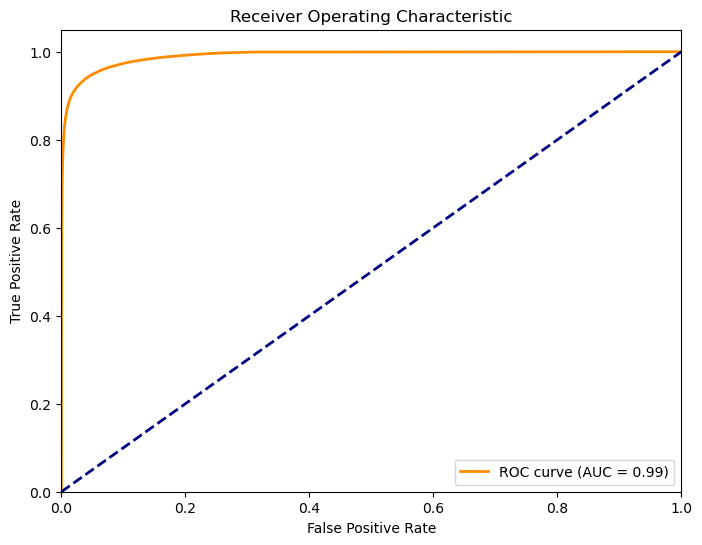

In [106]:
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.legend(loc="lower right")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.show()

<br><br>

## 3. Support Vector Classifier

### a) Training

In [107]:
svc_model = SVC(random_state=42, max_iter=3000)

svc_model.fit(X_train, y_train)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(max_iter=3000, random_state=42)

<br>

### b) Testing

In [108]:
svc_predictions = svc_model.predict(X_test)
svc_predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [109]:
print("Logistic Regression Report:")
print(classification_report(y_test, svc_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svc_predictions))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.66      0.48      0.56     88580
           1       0.59      0.75      0.66     88443

    accuracy                           0.62    177023
   macro avg       0.63      0.62      0.61    177023
weighted avg       0.63      0.62      0.61    177023


Confusion Matrix:
[[42492 46088]
 [21864 66579]]


In [110]:
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f'Support Vector Classifier Accuracy = {svc_accuracy}')

Support Vector Classifier Accuracy = 0.6161402755574135


<br><br>

## 4. Stochastic gradient descent(SGD)

### a) Training

In [111]:
sgd_model = SGDClassifier(loss='hinge', random_state=42)   # hinge gives us a linear SVM

sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

<br>

### b) Testing

In [112]:
sgd_predictions = sgd_model.predict(X_test)
sgd_predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [113]:
print("SGDClassifier Report:")
print(classification_report(y_test, sgd_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, sgd_predictions))

SGDClassifier Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     88580
           1       0.75      0.96      0.84     88443

    accuracy                           0.82    177023
   macro avg       0.85      0.82      0.82    177023
weighted avg       0.85      0.82      0.82    177023


Confusion Matrix:
[[60188 28392]
 [ 3135 85308]]


In [114]:
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f'Stochastic Gradient Descent Accuracy = {sgd_accuracy}')

Stochastic Gradient Descent Accuracy = 0.8219044982855335


<br><br>
## 5. Neural Networks

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

<br><br>
### i) Model 1 - activation function: sigmoid, optimizer: adam

In [89]:
model = Sequential()

# Input Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(1, activation='sigmoid'))             # For binary classifcation: 1 neuron in this layer, For multiclass: The number of neurons in this layer should be equal to the number of classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])        # accuracy is more appropriate for binary classification, mse for regression

<br>

### a) Training

In [90]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=10)

Epoch 1/10
3227/3227 [==============================] - 14s 4ms/step - loss: 0.3768 - accuracy: 0.8310 - val_loss: 0.3500 - val_accuracy: 0.8414
Epoch 2/10
3227/3227 [==============================] - 12s 4ms/step - loss: 0.3462 - accuracy: 0.8427 - val_loss: 0.3413 - val_accuracy: 0.8439
Epoch 3/10
3227/3227 [==============================] - 12s 4ms/step - loss: 0.3391 - accuracy: 0.8444 - val_loss: 0.3308 - val_accuracy: 0.8456
Epoch 4/10
3227/3227 [==============================] - 12s 4ms/step - loss: 0.3340 - accuracy: 0.8451 - val_loss: 0.3259 - val_accuracy: 0.8473
Epoch 5/10
3227/3227 [==============================] - 12s 4ms/step - loss: 0.3311 - accuracy: 0.8460 - val_loss: 0.3219 - val_accuracy: 0.8485
Epoch 6/10
3227/3227 [==============================] - 12s 4ms/step - loss: 0.3277 - accuracy: 0.8463 - val_loss: 0.3182 - val_accuracy: 0.8498
Epoch 7/10
3227/3227 [==============================] - 14s 4ms/step - loss: 0.3252 - accuracy: 0.8474 - val_loss: 0.3159 - val_ac

<br>

### b) Testing

In [91]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0  0.376841  0.830994  0.349981      0.841444
1  0.346248  0.842678  0.341273      0.843890
2  0.339080  0.844416  0.330845      0.845562
3  0.333975  0.845116  0.325894      0.847331
4  0.331137  0.846034  0.321874      0.848517
5  0.327666  0.846266  0.318152      0.849827
6  0.325158  0.847355  0.315903      0.846376
7  0.322692  0.847767  0.314076      0.846223
8  0.320713  0.847561  0.309407      0.850997
9  0.318216  0.848273  0.306996      0.852934

In [92]:
losses = losses[['loss', 'val_loss']]
losses

loss  val_loss
0  0.376841  0.349981
1  0.346248  0.341273
2  0.339080  0.330845
3  0.333975  0.325894
4  0.331137  0.321874
5  0.327666  0.318152
6  0.325158  0.315903
7  0.322692  0.314076
8  0.320713  0.309407
9  0.318216  0.306996

<Axes: >

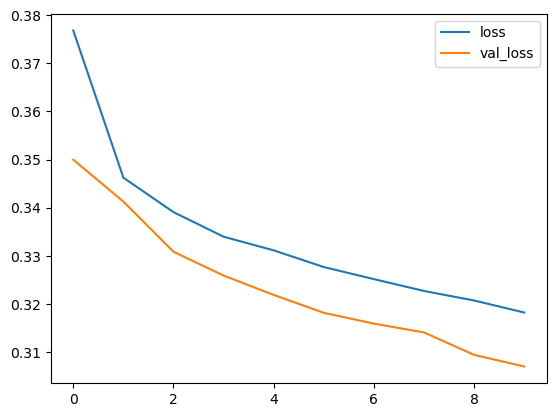

In [93]:
losses.plot()

Tips for Analysis:
<ul>
<li>Ideal Case: Both loss and val_loss decrease and stabilize over epochs.</li>
<li>Overfitting: loss decreases while val_loss increases.</li>
<li>Underfitting: Both loss and val_loss remain high without significant improvement.</li>
</ul>

In [94]:
nn_predictions = model.predict(X_test)           # provides the predictions for each class

5532/5532 [==============================] - 11s 2ms/step


In [65]:
# nn_predictions

In [95]:
threshold = 0.5
nn_predictions = (nn_predictions >= threshold).astype(int)

print(nn_predictions)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


<br>

### c) Evaluation

In [96]:
print("Neural Network Model 1 Report:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))

Neural Network Model 1 Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     88580
           1       0.78      0.97      0.87     88443

    accuracy                           0.85    177023
   macro avg       0.87      0.85      0.85    177023
weighted avg       0.87      0.85      0.85    177023


Confusion Matrix:
[[64996 23584]
 [ 2450 85993]]


In [97]:
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Model 1 Accuracy = {nn_accuracy}')

Neural Network Model 1 Accuracy = 0.8529343644611153


<br><br>
### ii) Model 2 - activation function: sigmoid, optimizer: adam, additional layers

In [79]:
model = Sequential()

# Input Layer
model.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Hidden Layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# Output layer with sigmoid function for binary classification, softmax function for multi-class classification
model.add(Dense(1, activation='sigmoid'))             # For binary: 1 neuron in this layer, For multiclass: The number of neurons in this layer should be equal to the number of classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])        # accuracy is more appropriate for binary classification, mse for regression

Input Layer Specification:
<ul>
    <li>input_dim: Required only for the first layer to define the input shape.</li>
    <li>Example: If your data has 20 features, set input_dim=20.</li>
</ul>

<br>

### a) Training

In [80]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=10)

Epoch 1/10
3227/3227 [==============================] - 18s 5ms/step - loss: 0.3622 - accuracy: 0.8361 - val_loss: 0.3382 - val_accuracy: 0.8447
Epoch 2/10
3227/3227 [==============================] - 16s 5ms/step - loss: 0.3315 - accuracy: 0.8455 - val_loss: 0.3055 - val_accuracy: 0.8470
Epoch 3/10
3227/3227 [==============================] - 16s 5ms/step - loss: 0.3127 - accuracy: 0.8478 - val_loss: 0.2910 - val_accuracy: 0.8537
Epoch 4/10
3227/3227 [==============================] - 16s 5ms/step - loss: 0.3041 - accuracy: 0.8486 - val_loss: 0.3008 - val_accuracy: 0.8554
Epoch 5/10
3227/3227 [==============================] - 17s 5ms/step - loss: 0.2994 - accuracy: 0.8496 - val_loss: 0.2795 - val_accuracy: 0.8506
Epoch 6/10
3227/3227 [==============================] - 16s 5ms/step - loss: 0.2962 - accuracy: 0.8501 - val_loss: 0.2790 - val_accuracy: 0.8567
Epoch 7/10
3227/3227 [==============================] - 16s 5ms/step - loss: 0.2942 - accuracy: 0.8505 - val_loss: 0.2795 - val_ac

<br>

### b) Testing

In [81]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0  0.362172  0.836098  0.338232      0.844732
1  0.331535  0.845513  0.305457      0.846969
2  0.312740  0.847818  0.291016      0.853703
3  0.304132  0.848563  0.300831      0.855363
4  0.299352  0.849602  0.279507      0.850556
5  0.296172  0.850135  0.278956      0.856651
6  0.294172  0.850500  0.279524      0.850562
7  0.293760  0.850708  0.281720      0.848189
8  0.291711  0.851200  0.273065      0.855765
9  0.291002  0.851406  0.277478      0.856815

In [82]:
losses = losses[['loss', 'val_loss']]
losses

loss  val_loss
0  0.362172  0.338232
1  0.331535  0.305457
2  0.312740  0.291016
3  0.304132  0.300831
4  0.299352  0.279507
5  0.296172  0.278956
6  0.294172  0.279524
7  0.293760  0.281720
8  0.291711  0.273065
9  0.291002  0.277478

<Axes: >

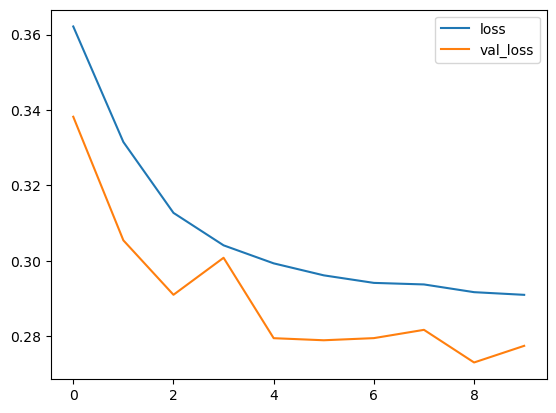

In [83]:
losses.plot()

In [84]:
nn_predictions = model.predict(X_test)           # provides the predictions for each class

5532/5532 [==============================] - 12s 2ms/step


In [65]:
# nn_predictions

In [85]:
threshold = 0.5
nn_predictions = (nn_predictions >= threshold).astype(int)

print(nn_predictions)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


<br>

### c) Evaluation

In [86]:
print("Neural Network Model 2 Report:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))

Neural Network Model 1 Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     88580
           1       0.80      0.95      0.87     88443

    accuracy                           0.86    177023
   macro avg       0.87      0.86      0.86    177023
weighted avg       0.87      0.86      0.86    177023


Confusion Matrix:
[[68063 20517]
 [ 4830 83613]]


In [87]:
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Model 2 Accuracy = {nn_accuracy}')

Neural Network Model 1 Accuracy = 0.8568152161018625


<br><br>
### iii) Model 3 - activation function: sigmoid, optimizer: SGD

In [46]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

model = Sequential()

# Input Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(1, activation='sigmoid'))             

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])        

<br>

### a) Training

In [47]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=10)

Epoch 1/10
3227/3227 [==============================] - 7s 2ms/step - loss: 0.3461 - accuracy: 0.8413 - val_loss: 0.3272 - val_accuracy: 0.8488
Epoch 2/10
3227/3227 [==============================] - 6s 2ms/step - loss: 0.3304 - accuracy: 0.8445 - val_loss: 0.3163 - val_accuracy: 0.8463
Epoch 3/10
3227/3227 [==============================] - 8s 2ms/step - loss: 0.3228 - accuracy: 0.8455 - val_loss: 0.3164 - val_accuracy: 0.8453
Epoch 4/10
3227/3227 [==============================] - 9s 3ms/step - loss: 0.3178 - accuracy: 0.8466 - val_loss: 0.3050 - val_accuracy: 0.8455
Epoch 5/10
3227/3227 [==============================] - 6s 2ms/step - loss: 0.3145 - accuracy: 0.8474 - val_loss: 0.3194 - val_accuracy: 0.8457
Epoch 6/10
3227/3227 [==============================] - 6s 2ms/step - loss: 0.3122 - accuracy: 0.8473 - val_loss: 0.2962 - val_accuracy: 0.8506
Epoch 7/10
3227/3227 [==============================] - 6s 2ms/step - loss: 0.3101 - accuracy: 0.8480 - val_loss: 0.2992 - val_accuracy:

<br>

### b) Testing

In [48]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0  0.346088  0.841257  0.327200      0.848760
1  0.330441  0.844453  0.316297      0.846286
2  0.322830  0.845535  0.316404      0.845342
3  0.317800  0.846561  0.304987      0.845506
4  0.314514  0.847375  0.319439      0.845681
5  0.312215  0.847305  0.296232      0.850630
6  0.310148  0.847968  0.299173      0.853612
7  0.308364  0.847871  0.294044      0.848234
8  0.306477  0.848617  0.293574      0.856346
9  0.305951  0.848401  0.291053      0.859199

In [49]:
losses = losses[['loss', 'val_loss']]
losses

loss  val_loss
0  0.346088  0.327200
1  0.330441  0.316297
2  0.322830  0.316404
3  0.317800  0.304987
4  0.314514  0.319439
5  0.312215  0.296232
6  0.310148  0.299173
7  0.308364  0.294044
8  0.306477  0.293574
9  0.305951  0.291053

<Axes: >

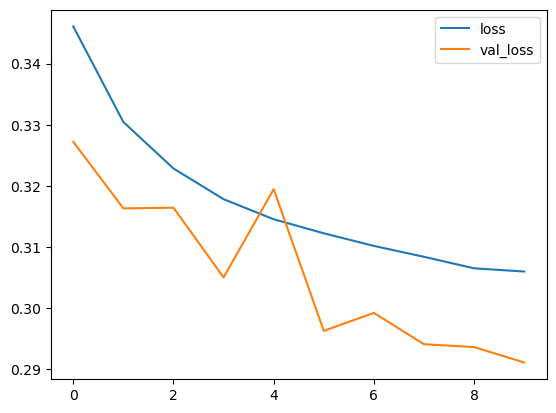

In [50]:
losses.plot()

In [51]:
nn_predictions = model.predict(X_test)           # provides the predictions for each class

5532/5532 [==============================] - 5s 818us/step


In [52]:
threshold = 0.5
nn_predictions = (nn_predictions >= threshold).astype(int)

print(nn_predictions)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


<br>

### c) Evaluation

In [53]:
print("Neural Network Model 3 Report:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))

Neural Network Model 1 Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     88580
           1       0.80      0.95      0.87     88443

    accuracy                           0.86    177023
   macro avg       0.87      0.86      0.86    177023
weighted avg       0.87      0.86      0.86    177023


Confusion Matrix:
[[68043 20537]
 [ 4388 84055]]


In [54]:
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Model 3 Accuracy = {nn_accuracy}')

Neural Network Model 1 Accuracy = 0.859199087124272
